1.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [8]:
df = pd.read_csv('exp_metrics.csv')

In [9]:
def get_bootstrap_dist(data, stat, n_iter=10000):
    stats_data = []
    for _ in tqdm(range(n_iter), ncols=80):
        bottstrap_sample = np.random.choice(data, size=len(data), replace=True)
        stats_data.append(stat(bottstrap_sample))
    return stats_data

In [12]:
def plot_dist_with_quantiles(dist, q=0.05):
    ax = sns.histplot(dist, bins=50)
    y_lim = ax.get_ylim()[1]
    mean = np.mean(dist)
    q1 = np.quantile(dist, q)
    q2 = np.quantile(dist, 1 - q)
    plt.vlines(mean, ymin=0, ymax=y_lim, colors='red')
    plt.vlines((q1, q2), ymin=0, ymax=y_lim*0.5, linestyle='--', colors='green')
    plt.title(f"mean = {mean:,.2f}, q_{q} = {q1:,.2f}, q_{1-q} = {q2:,.2f}")
    plt.show()

100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2044.23it/s]


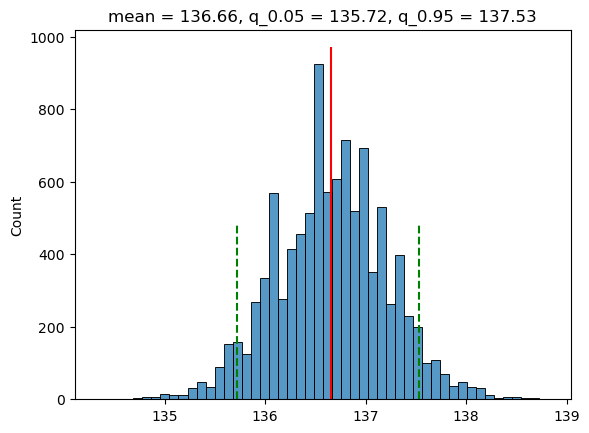

In [27]:
group_B_median_time_dist = get_bootstrap_dist(df[df['group'] == 'B']['sum_time'], np.median, n_iter=10000)
plot_dist_with_quantiles(group_B_median_time_dist)

100%|█████████████████████████████████| 100000/100000 [00:55<00:00, 1790.67it/s]


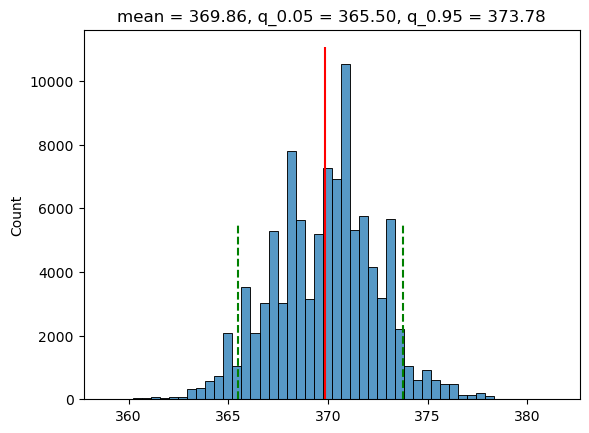

In [28]:
group_B_median_time_dist = get_bootstrap_dist(df[df['group'] == 'B']['sum_time'], stat=lambda x: np.quantile(x, 0.95), n_iter=100000)
plot_dist_with_quantiles(group_B_median_time_dist)

2.

In [20]:
def get_AB_diff_distribution(data_A, data_B, stat, n_iter=10000):
    diff_data = []
    for _ in tqdm(range(n_iter), ncols=80):
        bottstrap_sample_A = np.random.choice(data_A, size=len(data_A), replace=True)
        bottstrap_sample_B = np.random.choice(data_B, size=len(data_B), replace=True)
        diff = stat(bottstrap_sample_B) - stat(bottstrap_sample_A)
        diff_data.append(diff)
    return diff_data

100%|██████████████████████████████████| 100000/100000 [01:55<00:00, 864.78it/s]


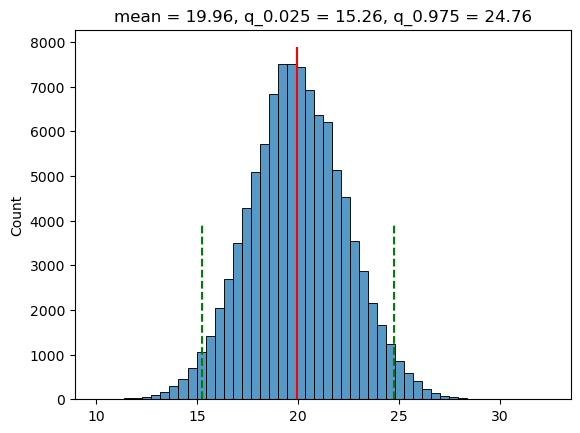

In [36]:
sum_time_diff = get_AB_diff_distribution(df[df['group'] == 'A']['sum_time'], df[df['group'] == 'B']['sum_time'], stat=lambda x: np.quantile(x, 0.9), n_iter=100000)
plot_dist_with_quantiles(sum_time_diff, q=0.025)

100%|██████████████████████████████████| 100000/100000 [01:54<00:00, 871.26it/s]


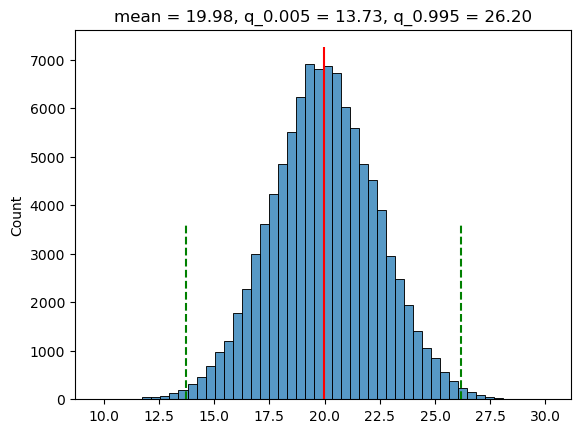

In [38]:
sum_time_diff = get_AB_diff_distribution(df[df['group'] == 'A']['sum_time'], df[df['group'] == 'B']['sum_time'], stat=lambda x: np.quantile(x, 0.9), n_iter=100000)
plot_dist_with_quantiles(sum_time_diff, q=0.005)

Среднее отличается на 19,98, следовательно статистически значимо.